In [101]:
import itertools
import time
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('./fundamentals.csv')
data.head()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


In [3]:
data.columns

Index(['Unnamed: 0', 'Ticker Symbol', 'Period Ending', 'Accounts Payable',
       'Accounts Receivable', 'Add'l income/expense items', 'After Tax ROE',
       'Capital Expenditures', 'Capital Surplus', 'Cash Ratio',
       'Cash and Cash Equivalents', 'Changes in Inventories', 'Common Stocks',
       'Cost of Revenue', 'Current Ratio', 'Deferred Asset Charges',
       'Deferred Liability Charges', 'Depreciation',
       'Earnings Before Interest and Tax', 'Earnings Before Tax',
       'Effect of Exchange Rate',
       'Equity Earnings/Loss Unconsolidated Subsidiary', 'Fixed Assets',
       'Goodwill', 'Gross Margin', 'Gross Profit', 'Income Tax',
       'Intangible Assets', 'Interest Expense', 'Inventory', 'Investments',
       'Liabilities', 'Long-Term Debt', 'Long-Term Investments',
       'Minority Interest', 'Misc. Stocks', 'Net Borrowings', 'Net Cash Flow',
       'Net Cash Flow-Operating', 'Net Cash Flows-Financing',
       'Net Cash Flows-Investing', 'Net Income', 'Net Income Ad

In [4]:
data.isnull().sum().sort_values(ascending = False)

Quick Ratio                     299
Cash Ratio                      299
Current Ratio                   299
Estimated Shares Outstanding    219
Earnings Per Share              219
                               ... 
Intangible Assets                 0
Income Tax                        0
Gross Profit                      0
Gross Margin                      0
Net Cash Flows-Financing          0
Length: 79, dtype: int64

In [5]:
data_cleaner = data.copy()
# Dropping columns based off of knowledge and/or null values
data_cleaner.drop(labels=['Unnamed: 0', 'Period Ending', 'For Year', 'Net Income Adjustments', 'Net Income Applicable to Common Shareholders','Net Income-Cont. Operations',
                         'Earnings Before Interest and Tax', 'Earnings Before Tax', 'Misc. Stocks', 'Net Cash Flow', 'Retained Earnings', 'Sale and Purchase of Stock',
                        'Total Liabilities & Equity', 'Treasury Stock', 'Earnings Per Share', 'Estimated Shares Outstanding', 'Cash Ratio', 'Current Ratio', 'Quick Ratio', 'Total Current Liabilities'], axis=1, inplace = True)

In [6]:
data_cleaner.isnull().sum().sort_values(ascending = False).head()

Ticker Symbol               0
Other Liabilities           0
Net Cash Flows-Investing    0
Net Income                  0
Net Receivables             0
dtype: int64

In [7]:
for column_name in data_cleaner.columns:
    column = data_cleaner[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  Ticker Symbol  is :  0
Count of zeros in column  Accounts Payable  is :  46
Count of zeros in column  Accounts Receivable  is :  193
Count of zeros in column  Add'l income/expense items  is :  305
Count of zeros in column  After Tax ROE  is :  7
Count of zeros in column  Capital Expenditures  is :  67
Count of zeros in column  Capital Surplus  is :  257
Count of zeros in column  Cash and Cash Equivalents  is :  0
Count of zeros in column  Changes in Inventories  is :  640
Count of zeros in column  Common Stocks  is :  101
Count of zeros in column  Cost of Revenue  is :  107
Count of zeros in column  Deferred Asset Charges  is :  1032
Count of zeros in column  Deferred Liability Charges  is :  577
Count of zeros in column  Depreciation  is :  13
Count of zeros in column  Effect of Exchange Rate  is :  589
Count of zeros in column  Equity Earnings/Loss Unconsolidated Subsidiary  is :  1239
Count of zeros in column  Fixed Assets  is :  51
Count of zeros in column

Sometimes a lot of 0s is okay if it makes sense in the context of the variable

In [97]:
import pandas as pd
from skimpy import clean_columns
data_cleaner = clean_columns(data_cleaner)
data_cleaner.head()

0 column names have been cleaned

,ticker_symbol,accounts_payable,accounts_receivable,addl_income_expense_items,after_tax_roe,capital_expenditures,capital_surplus,cash_and_cash_equivalents,changes_in_inventories,common_stocks,...,profit_margin,research_and_development,sales_general_and_admin,short_term_debt_current_portion_of_long_term_debt,short_term_investments,total_assets,total_current_assets,total_equity,total_liabilities,total_revenue
0,AAL,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,1.330000e+09,0.0,127000000.0,...,8.0,0.0,1.297700e+10,1.419000e+09,3.412000e+09,2.351000e+10,7.072000e+09,-7.987000e+09,2.489100e+10,2.485500e+10
1,AAL,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,2.175000e+09,0.0,5000000.0,...,7.0,0.0,1.291300e+10,1.446000e+09,8.111000e+09,4.227800e+10,1.432300e+10,-2.731000e+09,4.500900e+10,2.674300e+10
2,AAL,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,1.768000e+09,0.0,7000000.0,...,7.0,0.0,2.068600e+10,1.677000e+09,6.309000e+09,4.322500e+10,1.175000e+10,2.021000e+09,4.120400e+10,4.265000e+10
3,AAL,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,1.085000e+09,0.0,6000000.0,...,19.0,0.0,2.127500e+10,2.231000e+09,5.864000e+09,4.841500e+10,9.985000e+09,5.635000e+09,4.278000e+10,4.099000e+10
4,AAP,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,5.981110e+08,-260298000.0,7000.0,...,6.0,0.0,2.440721e+09,6.270000e+05,0.000000e+00,4.613814e+09,3.184200e+09,1.210694e+09,3.403120e+09,6.205003e+09


In [98]:
from sklearn.model_selection import train_test_split
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data_cleaner.drop(labels=['ticker_symbol', 'net_income'], axis=1),
    data_cleaner['net_income'],
    test_size=0.20,
    random_state=23)

In [99]:
train = pd.concat([X_train, y_train], axis = 1)

In [100]:
train.corrwith(train['net_income']).abs().sort_values(ascending = False)

net_income                                           1.000000
operating_income                                     0.915662
income_tax                                           0.890645
net_cash_flow_operating                              0.827232
gross_profit                                         0.775077
total_revenue                                        0.707769
total_equity                                         0.705667
sales_general_and_admin                              0.618690
total_current_assets                                 0.603381
depreciation                                         0.600202
accounts_payable                                     0.577577
cost_of_revenue                                      0.531961
capital_expenditures                                 0.520046
net_receivables                                      0.516953
net_cash_flows_investing                             0.500887
other_current_assets                                 0.496438
research

<AxesSubplot:xlabel='Profit Margin', ylabel='Net Income'>

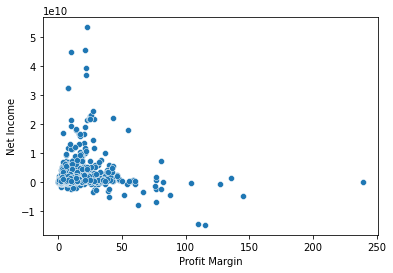

In [11]:
sns.scatterplot(x = 'Profit Margin', y = 'Net Income', data = train)

In [12]:
data_cleaner[data_cleaner['Profit Margin'] > 100]

,Ticker Symbol,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,...,Profit Margin,Research and Development,"Sales, General and Admin.",Short-Term Debt / Current Portion of Long-Term Debt,Short-Term Investments,Total Assets,Total Current Assets,Total Equity,Total Liabilities,Total Revenue
139,APA,6.180000e+08,6.630000e+08,-1.700000e+07,917.0,-5.178000e+09,1.246700e+10,1.467000e+09,21000000.0,257000000.0,...,369.0,0.000000e+00,7.910000e+08,0.0,0.000000e+00,1.884200e+10,3.752000e+09,2.566000e+09,1.627600e+10,6.383000e+09
305,CHK,1.045000e+09,1.186000e+09,1.340000e+08,687.0,-3.771000e+09,1.240300e+10,8.250000e+08,0.0,7000000.0,...,115.0,0.000000e+00,3.340000e+08,421000000.0,0.000000e+00,1.735700e+10,2.480000e+09,2.138000e+09,1.496000e+10,1.276400e+10
379,COTY,2.630000e+05,2.750000e+05,2.200000e+04,79.0,-5.000000e+04,1.024700e+07,3.060000e+05,15000.0,12000.0,...,239.0,3.000000e+04,3.940000e+06,0.0,5.390000e+06,7.188000e+06,6.639000e+06,4.611000e+06,2.577000e+06,1.514000e+06
381,COTY,1.556900e+07,-2.979000e+06,-5.466900e+07,134.0,-8.960000e+05,7.482800e+07,3.303000e+06,-12364000.0,37000.0,...,104.0,0.000000e+00,2.585300e+07,2000000.0,0.000000e+00,2.168950e+08,4.865800e+07,-7.713800e+07,2.940330e+08,9.964200e+07
514,DVN,9.060000e+08,0.000000e+00,-2.400000e+07,205.0,-6.415000e+09,4.996000e+09,2.310000e+09,0.0,42000000.0,...,110.0,0.000000e+00,7.741000e+09,976000000.0,0.000000e+00,2.945100e+10,4.021000e+09,7.049000e+09,2.240200e+10,1.314500e+10
1017,MAC,1.003118e+09,-1.412600e+07,1.477535e+09,27.0,-2.006450e+08,5.041797e+09,9.843700e+07,0.0,1582000.0,...,136.0,0.000000e+00,2.941200e+07,0.0,0.000000e+00,1.312178e+10,0.000000e+00,5.640120e+09,7.481658e+09,1.105247e+09
1155,NFX,6.320000e+08,8.300000e+07,2.450000e+08,244.0,-1.745000e+09,2.436000e+09,5.000000e+06,-2000000.0,2000000.0,...,216.0,0.000000e+00,5.204000e+09,13000000.0,0.000000e+00,4.768000e+09,6.250000e+08,1.379000e+09,3.389000e+09,1.557000e+09
1477,SWN,6.790000e+08,2.030000e+08,3.000000e+08,200.0,-1.798000e+09,3.409000e+09,1.500000e+07,4000000.0,4000000.0,...,145.0,0.000000e+00,1.208000e+09,4000000.0,0.000000e+00,8.110000e+09,3.930000e+08,2.282000e+09,5.828000e+09,3.133000e+09
1660,VRTX,2.808700e+08,7.428000e+06,3.040000e+07,69.0,-5.120100e+07,5.777154e+09,6.336770e+08,-16469000.0,2385000.0,...,127.0,8.555060e+08,3.054090e+08,32012000.0,7.618470e+08,2.334679e+09,1.546511e+09,1.075006e+09,1.259673e+09,5.804150e+08
1732,XEC,3.966360e+08,1.866990e+08,2.482200e+07,86.0,-1.049636e+09,2.762976e+09,7.793820e+08,0.0,948000.0,...,166.0,0.000000e+00,1.798670e+08,0.0,0.000000e+00,5.243286e+09,1.077930e+09,2.797678e+09,2.445608e+09,1.452619e+09


Shouldn't be able to have profit margin greater than 100%

<AxesSubplot:xlabel='Pre-Tax Margin', ylabel='Net Income'>

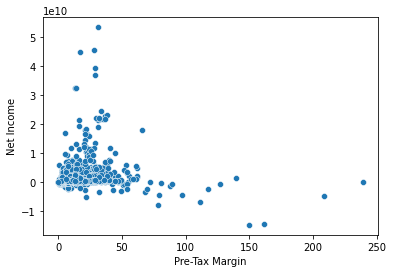

In [13]:
sns.scatterplot(x = 'Pre-Tax Margin', y = 'Net Income', data = train)

<AxesSubplot:xlabel='Accounts Payable', ylabel='Net Income'>

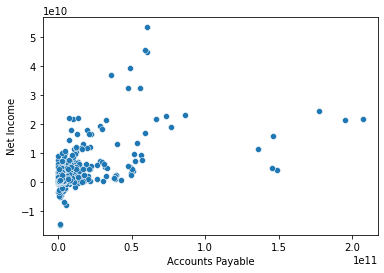

In [14]:
sns.scatterplot(x = 'Accounts Payable', y = 'Net Income', data = train)

<AxesSubplot:xlabel='Research and Development', ylabel='Net Income'>

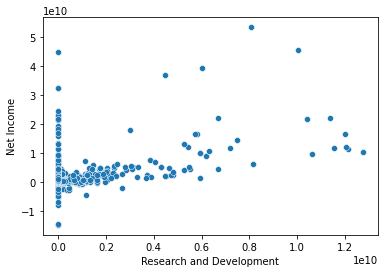

In [15]:
sns.scatterplot(x = 'Research and Development', y = 'Net Income', data = train)

Consider turning R&D into a categorical variable (1 if non-zero, 0 otherwise)

<AxesSubplot:xlabel='Short-Term Debt / Current Portion of Long-Term Debt', ylabel='Net Income'>

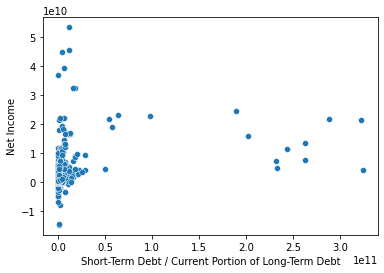

In [16]:
sns.scatterplot(x = 'Short-Term Debt / Current Portion of Long-Term Debt', y = 'Net Income', data = train)

In [17]:
train.corrwith(train['Net Income']).sort_values(ascending = False)

Net Income                                             1.000000
Operating Income                                       0.915662
Income Tax                                             0.890645
Net Cash Flow-Operating                                0.827232
Gross Profit                                           0.775077
Total Revenue                                          0.707769
Total Equity                                           0.705667
Sales, General and Admin.                              0.618690
Total Current Assets                                   0.603381
Depreciation                                           0.600202
Accounts Payable                                       0.577577
Cost of Revenue                                        0.531961
Net Receivables                                        0.516953
Other Current Assets                                   0.496438
Research and Development                               0.463999
Total Assets                            

In [26]:
pip install skimpy

     |████████████████████████████████| 19.8 MB 9.1 MB/s eta 0:00:01
     |████████████████████████████████| 96 kB 15.2 MB/s eta 0:00:011
     |████████████████████████████████| 237 kB 12.0 MB/s eta 0:00:01
     |████████████████████████████████| 51 kB 26.6 MB/s eta 0:00:011


  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: click
    Found existing installation: click 8.0.4
    Uninstalling click-8.0.4:
      Successfully uninstalled click-8.0.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
scipy 1.7.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.24.2 which is incompatible.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.24.2 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [29]:
import pandas as pd
from skimpy import clean_columns
train_clean = clean_columns(train)
train_clean.columns.tolist()

58 column names have been cleaned

['accounts_payable',
 'accounts_receivable',
 'addl_income_expense_items',
 'after_tax_roe',
 'capital_expenditures',
 'capital_surplus',
 'cash_and_cash_equivalents',
 'changes_in_inventories',
 'common_stocks',
 'cost_of_revenue',
 'deferred_asset_charges',
 'deferred_liability_charges',
 'depreciation',
 'effect_of_exchange_rate',
 'equity_earnings_loss_unconsolidated_subsidiary',
 'fixed_assets',
 'goodwill',
 'gross_margin',
 'gross_profit',
 'income_tax',
 'intangible_assets',
 'interest_expense',
 'inventory',
 'investments',
 'liabilities',
 'long_term_debt',
 'long_term_investments',
 'minority_interest',
 'net_borrowings',
 'net_cash_flow_operating',
 'net_cash_flows_financing',
 'net_cash_flows_investing',
 'net_receivables',
 'non_recurring_items',
 'operating_income',
 'operating_margin',
 'other_assets',
 'other_current_assets',
 'other_current_liabilities',
 'other_equity',
 'other_financing_activities',
 'other_investing_activities',
 'other_liabilities',
 'other_operat

In [32]:
all_columns = '+'.join(train_clean.columns.difference(['net_income']))
ols_object = smf.ols(formula = 'net_income~' + all_columns, data = train_clean) 
model = ols_object.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             net_income   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     1401.
Date:                Sat, 25 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:57:18   Log-Likelihood:                -30638.
No. Observations:                1424   AIC:                         6.139e+04
Df Residuals:                    1366   BIC:                         6.170e+04
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                         -2.631e+07   4.18e+07     -0.630      0.529   -1.08e+08    5.57e+07
accounts_payable                                     -0.0235      0.006     -4.046      0.000      -0.035      -0.012
accounts_receivable                                  -0.0991      0.036     -2.786      0.005      -0.169      -0.029
addl_income_expense_items                             0.5794      0.031     18.879      0.000       0.519       0.640
after_tax_roe                                      2.099e+05    3.8e+05      0.553      0.581   -5.35e+05    9.55e+05
capital_expenditures                                  0.0032      0.019      0.167      0.867      -0.034       0.041
capital_surplus                                      -0.0097      0.003     -2.822      0.005      -0.016      -0.003
cash_and_cash_equivalents                             0.0023      0.003      0.660      0.510      -0.005       0.009
changes_in_inventories                               -0.2076      0.043     -4.819      0.000      -0.292      -0.123
common_stocks                                        -0.0454      0.005    -10.010      0.000      -0.054      -0.037
cost_of_revenue                                      -0.1856      0.018    -10.326      0.000      -0.221      -0.150
deferred_asset_charges                                0.0481      0.012      3.925      0.000       0.024       0.072
deferred_liability_charges                            0.0380      0.010      3.812      0.000       0.018       0.058
depreciation                                         -0.1136      0.027     -4.260      0.000      -0.166      -0.061
effect_of_exchange_rate                               1.0675      0.146      7.322      0.000       0.781       1.353
equity_earnings_loss_unconsolidated_subsidiary        0.6988      0.047     14.913      0.000       0.607       0.791
fixed_assets                                         -0.0178      0.005     -3.903      0.000      -0.027      -0.009
goodwill                                             -0.0139      0.006     -2.383      0.017      -0.025      -0.002
gross_margin                                       3.668e+04    8.6e+05      0.043      0.966   -1.65e+06    1.72e+06
gross_profit                                         -0.0771      0.014     -5.679      0.000      -0.104      -0.050
income_tax                                           -0.4881      0.036    -13.689      0.000      -0.558      -0.418
intangible_assets                                     0.0018      0.006      0.283      0.777      -0.010       0.014
interest_expense                                     -0.4943      0.066     -7.474      0.000      -0.624      -0.365
inventory      

Text(0, 0.5, 'Residuals')

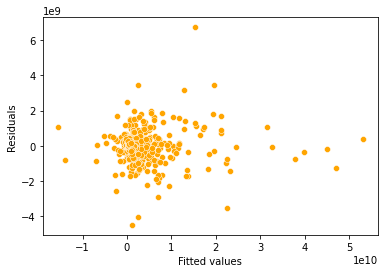

In [33]:
ax = sns.scatterplot(x = model.fittedvalues, y=model.resid,color = 'orange')

plt.xlabel('Fitted values')
plt.ylabel('Residuals')

In [34]:
train.corr()

,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,Cost of Revenue,...,Research and Development,"Sales, General and Admin.",Short-Term Debt / Current Portion of Long-Term Debt,Short-Term Investments,Total Assets,Total Current Assets,Total Equity,Total Liabilities,Total Revenue,Net Income
Accounts Payable,1.000000,0.131807,0.168395,-0.016412,-0.252695,0.432572,0.811417,-0.108808,0.514043,0.342708,...,0.124536,0.746451,0.802396,0.116971,0.832959,0.300206,0.800086,0.819742,0.535158,0.577577
Accounts Receivable,0.131807,1.000000,-0.056067,0.003657,0.070263,0.161025,0.161087,0.097304,-0.038884,-0.082061,...,-0.092518,0.050380,0.149701,-0.057820,0.198338,-0.160780,0.146291,0.201391,-0.061360,-0.040553
Add'l income/expense items,0.168395,-0.056067,1.000000,-0.008700,-0.435542,0.031552,0.032210,-0.099201,0.064366,0.344949,...,0.079384,0.260746,0.067711,0.029844,0.068372,0.251607,0.254241,0.040907,0.367246,0.372451
After Tax ROE,-0.016412,0.003657,-0.008700,1.000000,0.026581,-0.035080,-0.019068,0.027222,-0.015102,-0.019011,...,-0.003851,-0.021537,-0.018238,-0.013930,-0.030410,-0.010668,-0.054607,-0.026359,-0.023183,-0.016236
Capital Expenditures,-0.252695,0.070263,-0.435542,0.026581,1.000000,-0.234813,0.010814,0.112029,-0.117887,-0.577647,...,-0.156070,-0.448053,-0.029624,-0.130130,-0.111272,-0.471602,-0.464158,-0.059336,-0.648782,-0.520046
Capital Surplus,0.432572,0.161025,0.031552,-0.035080,-0.234813,1.000000,0.462364,-0.007709,-0.031076,0.133949,...,0.047189,0.482462,0.461944,0.101084,0.601397,0.129257,0.621819,0.585658,0.288592,0.335561
Cash and Cash Equivalents,0.811417,0.161087,0.032210,-0.019068,0.010814,0.462364,1.000000,0.013761,0.473408,-0.024808,...,-0.015024,0.633895,0.860425,0.023970,0.915964,-0.026542,0.757581,0.918564,0.201080,0.364733
Changes in Inventories,-0.108808,0.097304,-0.099201,0.027222,0.112029,-0.007709,0.013761,1.000000,0.010595,-0.245242,...,-0.023970,-0.164905,0.014737,-0.018285,-0.000753,-0.173326,-0.053472,0.006641,-0.235357,-0.142662
Common Stocks,0.514043,-0.038884,0.064366,-0.015102,-0.117887,-0.031076,0.473408,0.010595,1.000000,0.090366,...,0.373070,0.452421,0.506625,0.450461,0.485600,0.325887,0.548856,0.466342,0.254655,0.366600
Cost of Revenue,0.342708,-0.082061,0.344949,-0.019011,-0.577647,0.133949,-0.024808,-0.245242,0.090366,1.000000,...,0.113836,0.470698,0.013529,0.148359,0.104020,0.602475,0.353378,0.066829,0.945616,0.531961


In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X=train_clean[['accounts_payable',
 'accounts_receivable',
 'addl_income_expense_items',
 'after_tax_roe',
 'capital_expenditures',
 'capital_surplus',
 'cash_and_cash_equivalents',
 'changes_in_inventories',
 'common_stocks',
 'cost_of_revenue',
 'deferred_asset_charges',
 'deferred_liability_charges',
 'depreciation',
 'effect_of_exchange_rate',
 'equity_earnings_loss_unconsolidated_subsidiary',
 'fixed_assets',
 'goodwill',
 'gross_profit',
 'income_tax',
 'intangible_assets',
 'interest_expense',
 'inventory',
 'investments',
 'liabilities',
 'long_term_debt',
 'long_term_investments',
 'minority_interest',
 'net_borrowings',
 'net_cash_flow_operating',
 'net_cash_flows_financing',
 'net_cash_flows_investing',
 'net_receivables',
 'non_recurring_items',
 'operating_income',
 'other_assets',
 'other_current_assets',
 'other_current_liabilities',
 'other_equity',
 'other_financing_activities',
 'other_investing_activities',
 'other_liabilities',
 'other_operating_activities',
 'other_operating_items',
 'pre_tax_roe',
 'research_and_development',
 'sales_general_and_admin',
 'short_term_debt_current_portion_of_long_term_debt',
 'short_term_investments',
 'total_assets',
 'total_current_assets',
 'total_equity',
 'total_liabilities',
 'total_revenue']]
X = add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

for i in range(len(X.columns)):
    vif_data.loc[i,'VIF'] = variance_inflation_factor(X.values, i)

print(vif_data)

                                              feature            VIF
0                                               const       1.925359
1                                    accounts_payable      31.318733
2                                 accounts_receivable       3.771509
3                           addl_income_expense_items       1.955326
4                                       after_tax_roe      41.329429
5                                capital_expenditures      15.649498
6                                     capital_surplus       7.245760
7                           cash_and_cash_equivalents     181.079604
8                              changes_in_inventories       1.364059
9                                       common_stocks       9.833217
10                                    cost_of_revenue    1093.850237
11                             deferred_asset_charges       5.874439
12                         deferred_liability_charges       9.846318
13                                

In [73]:
# selecting the variables with VIF <10 and building a new linear regression with just those variables
VIF_cleaned_features=vif_data.loc[vif_data['VIF']<10,:].feature
VIF_cleaned_features=VIF_cleaned_features.to_frame()
VIF_cleaned_features.drop(0,axis=0,inplace=True)


In [95]:
train_clean['accounts_receivable'].describe()

count    1.424000e+03
mean    -5.143400e+07
std      7.903542e+08
min     -6.452000e+09
25%     -1.041000e+08
50%     -1.900000e+07
75%      7.546000e+06
max      2.266400e+10
Name: accounts_receivable, dtype: float64

In [88]:
all_columns_new = '+'.join(VIF_cleaned_features['feature'])
ols_object_new = smf.ols(formula = 'np.log(net_income)~' + all_columns_new, data = train_clean) 
model_new = ols_object_new.fit()
model_new.summary()

/Users/harrisonwang/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     np.log(net_income)   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     57.27
Date:                Sat, 25 Feb 2023   Prob (F-statistic):          4.01e-157
Time:                        15:46:21   Log-Likelihood:                -1709.3
No. Observations:                1342   AIC:                             3459.
Df Residuals:                    1322   BIC:                             3563.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         20.0628      0.029    681.353      0.000      20.005      20.121
accounts_receivable                            -4.629e-11   3.96e-11     -1.169      0.243   -1.24e-10    3.14e-11
addl_income_expense_items                        9.54e-11   4.41e-11      2.161      0.031     8.8e-12    1.82e-10
capital_surplus                                 3.113e-11      3e-12     10.388      0.000    2.52e-11     3.7e-11
changes_in_inventories                         -3.254e-11   6.49e-11     -0.502      0.616    -1.6e-10    9.47e-11
common_stocks                                   1.782e-11   2.86e-12      6.226      0.000    1.22e-11    2.34e-11
deferred_asset_charges                          2.705e-11    9.7e-12      2.787      0.005    8.01e-12    4.61e-11
deferred_liability_charges                      4.896e-11   8.32e-12      5.882      0.000    3.26e-11    6.53e-11
effect_of_exchange_rate                         -1.87e-10      2e-10     -0.936      0.349   -5.79e-10    2.05e-10
equity_earnings_loss_unconsolidated_subsidiary -3.874e-12   4.65e-11     -0.083      0.934   -9.52e-11    8.74e-11
intangible_assets                              -9.223e-12   5.23e-12     -1.765      0.078   -1.95e-11    1.03e-12
inventory                                       5.823e-11   8.07e-12      7.220      0.000    4.24e-11    7.41e-11
liabilities                                     4.554e-12    1.5e-11      0.304      0.761   -2.48e-11    3.39e-11
minority_interest                                1.57e-11   8.41e-12      1.866      0.062    -8.1e-13    3.22e-11
non_recurring_items                            -1.077e-10   3.17e-11     -3.398      0.001    -1.7e-10   -4.55e-11
other_current_assets                            5.506e-11   2.05e-11      2.682      0.007    1.48e-11    9.53e-11
other_equity                                   -4.635e-11   1.01e-11     -4.606      0.000   -6.61e-11   -2.66e-11
other_investing_activities                      2.282e-13   8.01e-12      0.029      0.977   -1.55e-11    1.59e-11
other_operating_activities                      9.826e-12   1.28e-11      0.769      0.442   -1.52e-11    3.49e-11
research_and_development                        1.983e-10   2.22e-11      8.922      0.000    1.55e-10    2.42e-10
==============================================================================
Omnibus:                       96.084   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.830
Skew:                          -0.463   Prob(JB):                     1.10e-43
Kurtosis:                       4.637   Cond. No.                     1.75e+10
===========================================

Text(0, 0.5, 'Residuals')

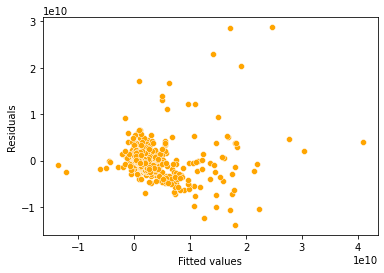

In [81]:
ax = sns.scatterplot(x = model_new.fittedvalues, y=model_new.resid,color = 'orange')

plt.xlabel('Fitted values')
plt.ylabel('Residuals')

In [77]:
correlation_matrix=train_clean[list(VIF_cleaned_features.feature)].corr()
correlation_matrix.loc['other_current_assets',:].abs().sort_values(ascending=False)

other_current_assets                              1.000000
deferred_liability_charges                        0.420238
research_and_development                          0.406319
intangible_assets                                 0.367187
addl_income_expense_items                         0.236079
equity_earnings_loss_unconsolidated_subsidiary    0.215836
common_stocks                                     0.200447
inventory                                         0.191851
capital_surplus                                   0.186176
other_equity                                      0.140877
effect_of_exchange_rate                           0.115660
deferred_asset_charges                            0.091980
other_investing_activities                        0.085779
accounts_receivable                               0.074432
non_recurring_items                               0.060245
minority_interest                                 0.059291
other_operating_activities                        0.0583

In [ ]:
from sklearn.linear_model import Lasso
alpha_lasso = [1, 10, 100, 1000, 10000, 10000000000000]

In [ ]:
# Defining a function which will fit lasso regression model, plot the results, and return the coefficient
def lasso_regression(train_x, train_y, test_x, test_y, alpha, models_to_plot={}):
    
    #fit the model
    
    
    if alpha == 0:
        ls = LinearRegression()    
    else:
        ls = Lasso(alpha=alpha, max_iter=10000, tol=0.1)
    lassoreg=make_pipeline(StandardScaler(with_mean=False), ls)
    lassoreg.fit(train_x, train_y)
    train_y_pred = lassoreg.predict(train_x)
    test_y_pred = lassoreg.predict(test_x)
        
        
    
    #check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        # plt_tight_layout()
        plt.plot(train_x[:, 0:1], train_y_pred)
        plt.plot(train_x[:, 0:1], train_y, '.')
        
        plt.title('Plot for alpha: %.3g'%alpha)
        
    #return the result in pre-defined format
    mrss_train = sum((train_y_pred - train_y)**2)/train_x.shape[0]
    ret = [mrss_train]
    
    mrss_test = sum((test_y_pred - test_y)**2)/test_x.shape[0]
    ret.extend([mrss_test])
    
    ret.extend([ls.intercept_])
    ret.extend(ls.coef_)
    
    return ret

In [ ]:
X_train.shape

In [ ]:
#initialize a dataframe to store the coefficient:
col = ['mrss_train', 'mrss_test', 'intercept'] + ['coef_VaR_%d'%i for i in range(1, 58)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0, 6)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

In [ ]:
for i in range(6):
    coef_matrix_lasso.iloc[i,] = lasso_regression(X_train, y_train, X_test, y_test, alpha_lasso[i])

In [ ]:
coef_matrix_lasso

Possible that some variables with low correlation are still related but not linearly